In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import random

import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

os.environ['PYTHONHASHSEED'] = '0'

In [2]:
test_file="T_origin.pickle"
tmp = np.load(test_file)
data_14 = tmp.values

先检验时域

In [12]:
    test = data_14[13]
    num_large = 400

    data_zif90_1 = test[:2251]
    noise = []

    h_the = np.partition(data_zif90_1, -num_large)[-num_large]
    for number in data_zif90_1:
        if number <= h_the:
            noise.append(number)

(array([ 21.,  61., 109., 188., 283., 225., 198., 162., 118., 103.,  74.,
         62.,  43.,  43.,  38.,  21.,  28.,  25.,  25.,  30.]),
 array([136.667, 164.167, 191.667, 219.167, 246.667, 274.167, 301.667,
        329.167, 356.667, 384.167, 411.667, 439.167, 466.667, 494.167,
        521.667, 549.167, 576.667, 604.167, 631.667, 659.167, 686.667]),
 <a list of 20 Patch objects>)

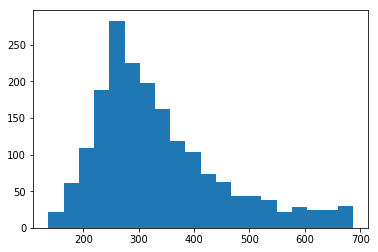

In [31]:
plt.hist(noise,20)

(array([  9.,  34.,  77., 190., 170., 191., 183., 120.,  95.,  91., 112.,
        108.,  97.,  94.,  66.,  36.,  59.,  40.,  37.,  43.]),
 array([143.333 , 171.9997, 200.6664, 229.3331, 257.9998, 286.6665,
        315.3332, 343.9999, 372.6666, 401.3333, 430.    , 458.6667,
        487.3334, 516.0001, 544.6668, 573.3335, 602.0002, 630.6669,
        659.3336, 688.0003, 716.667 ]),
 <a list of 20 Patch objects>)

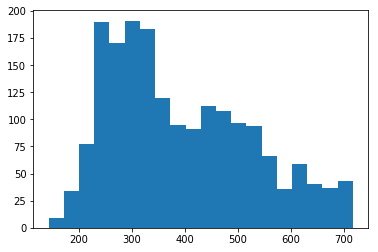

In [34]:
    test = data_14[12]
    num_large = 400

    data_zif90 = test[:2251]
    noise = []

    h_the = np.partition(data_zif90, -num_large)[-num_large]
    for number in data_zif90:
        if number <= h_the:
            noise.append(number)
    plt.hist(noise,20)

一下检验转成频域后的noise是否符合高斯分布

['original', 'no_peak', 'only_peak']


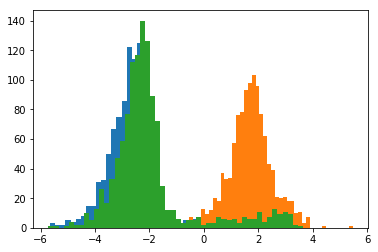

In [36]:
	test_file="T_origin.pickle"
	tmp = np.load(test_file)
	data_14 = tmp.values

	test = data_14[13]
	num_large = 400


	data_zif90 = test[:2251]
	data_zif90 -= np.median(data_zif90)
	data_zif90[data_zif90<0] = 0
	########################替换peak为mean
	h_the = np.partition(data_zif90, -num_large)[-num_large]
	copy_no_peak = np.copy(data_zif90)

	copy_no_peak[data_zif90 > h_the] = np.median(data_zif90)

	########################替换noise为0
	copy_only_peak = np.copy(data_zif90)
	copy_only_peak[data_zif90 < h_the] = 0

	names= ['original', 'no_peak', 'only_peak']
	print(names)


	fft_len = 2304
	effect = int(fft_len / 2)

	data = np.zeros((len(names), fft_len))

	data[0, 20:2251+20] = data_zif90
	data[1, 20:2251+20] = copy_no_peak
	data[2, 20:2251+20] = copy_only_peak

	magnitd = np.zeros((len(names), effect+1))

	for i in range(len(names)):
		data[i] /= np.max(np.abs(data[i]))

		tmp_complex = (np.fft.fft(data[i]))[:int(fft_len/2+1)]
		magnitd[i] = np.log(np.abs(tmp_complex) + 0.000001)
		plt.hist(magnitd[i],50)
   
# 		plt.clf()
# 		figname = str(i) + '.eps'
		#plt.plot(magnitd[i],     'r', label='freq')
# 		plt.plot(data[i],     'r', label='freq')

# 		plt.title(str(i) + names[i])
# 		plt.legend(bbox_to_anchor=(0.2, 1.08, 1., .102), loc=1)
# 		plt.savefig(figname)
# 		plt.close(0)

(array([  3.,   4.,   5.,  11.,  19.,  36.,  68., 111., 194., 254., 209.,
        108.,  54.,  44.,  23.,   8.,   1.,   0.,   0.,   1.]),
 array([-1.67170305, -1.31460865, -0.95751426, -0.60041986, -0.24332546,
         0.11376893,  0.47086333,  0.82795773,  1.18505213,  1.54214652,
         1.89924092,  2.25633532,  2.61342971,  2.97052411,  3.32761851,
         3.68471291,  4.0418073 ,  4.3989017 ,  4.7559961 ,  5.11309049,
         5.47018489]),
 <a list of 20 Patch objects>)

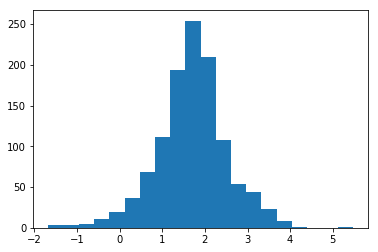

In [42]:
	plt.hist(magnitd[1],20)


(array([  2.,   0.,   0.,   0.,   3.,   0.,   2.,   6.,   5.,   4.,  19.,
         14.,  17.,  22.,  35.,  39.,  69.,  82.,  88.,  96., 103., 115.,
        102.,  85.,  71.,  33.,  15.,   6.,   3.,   5.,   2.,   6.,   1.,
          8.,   2.,   7.,   6.,   4.,   5.,   5.,   7.,  10.,   4.,  14.,
          9.,   9.,   9.,   3.,   0.,   1.]),
 array([-4.20438852, -4.04753611, -3.8906837 , -3.73383129, -3.57697887,
        -3.42012646, -3.26327405, -3.10642164, -2.94956923, -2.79271682,
        -2.63586441, -2.47901199, -2.32215958, -2.16530717, -2.00845476,
        -1.85160235, -1.69474994, -1.53789752, -1.38104511, -1.2241927 ,
        -1.06734029, -0.91048788, -0.75363547, -0.59678306, -0.43993064,
        -0.28307823, -0.12622582,  0.03062659,  0.187479  ,  0.34433141,
         0.50118382,  0.65803624,  0.81488865,  0.97174106,  1.12859347,
         1.28544588,  1.44229829,  1.5991507 ,  1.75600312,  1.91285553,
         2.06970794,  2.22656035,  2.38341276,  2.54026517,  2.69711758,
 

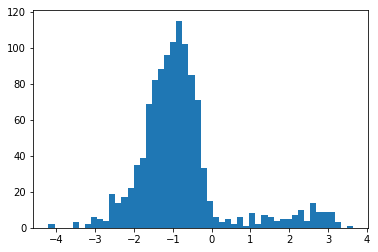

In [26]:
	plt.hist(magnitd[2],50) 